* Creating monthly sales by setting the index as order date and resample according to months by sales then resetting the index back to column

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("../data/superstore.csv", encoding="latin1")
df['Order Date'] = pd.to_datetime(df['Order Date'])

monthly_sales = (
    df
    .set_index('Order Date')
    .resample('M')['Sales']
    .sum()
    .reset_index()
)

monthly_sales.head()


C:\Users\sanja\AppData\Local\Temp\ipykernel_15644\322358519.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Sales']


,Order Date,Sales
0,2014-01-31,14236.895
1,2014-02-28,4519.892
2,2014-03-31,55691.009
3,2014-04-30,28295.345
4,2014-05-31,23648.287


* Adding up new column by creating numbers as upto total months because Linear cannot understand dates

In [9]:
monthly_sales['time_index'] = np.arange(len(monthly_sales))


* Setting up first 38 months as train and remaining 10 months as test size

In [10]:
train_size = int(len(monthly_sales) * 0.8)
train = monthly_sales.iloc[:train_size]
test = monthly_sales.iloc[train_size:]


* Fitting the model to time index and sales as training

In [11]:
model = LinearRegression()
model.fit(train[['time_index']], train['Sales'])


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


* Predicting the test from the trained model

In [12]:
test['predicted_sales'] = model.predict(test[['time_index']])

C:\Users\sanja\AppData\Local\Temp\ipykernel_15644\35870124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = model.predict(test[['time_index']])


* Evaluating the model

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(test['Sales'], test['predicted_sales'])
rmse = np.sqrt(mse)
r2 = r2_score(test['Sales'], test['predicted_sales'])

rmse, r2


(np.float64(23416.378372719904), 0.03422784841230886)

* Showcasing the sales forecasting from our model result

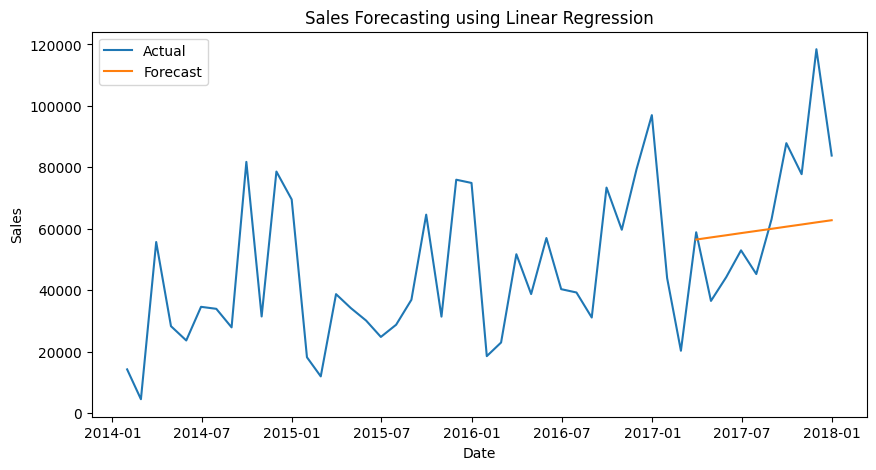

In [15]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Order Date'], monthly_sales['Sales'], label='Actual')
plt.plot(test['Order Date'], test['predicted_sales'], label='Forecast')
plt.title("Sales Forecasting using Linear Regression")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


The model captures the overall upward trend in sales but does not fully capture seasonal fluctuations. This suggests that while long-term growth can be estimated, more advanced time-series models (e.g., ARIMA, Prophet) could further improve accuracy.